In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
#Read the data
df1=pd.read_csv("C:\\Users\\Shrutee\\OneDrive - Microsoft\\Code\\MachineLearning\\Kenneth_CTAnalysis\\Data\\LT_Processed_without_Outliers.csv")

In [3]:
df1.head()

,NewDCFlag,ColoReady At PlanReservationStart Flag,DeploymentSeverity,EngineeringGroup,PlanResourceTypeName,IsAddRack,IsFirstFootprint,IsNPI,PlanGEO,PlanIntentName,...,NumberOfServers,PlanOrderPriorityName,PlanPropertyGroupName,Region,RegionGroup,RegionType,SKU Avaliable Flag,SKUCategoryName,CT Signal to LIve,CT Signal to Dock
0,True,missing,5.0,Azure,Compute,missing,False,False,Asia Pacific,Growth,...,800.0,99-ZZ No Priority,Azure Compute APAC,Southeast Asia,Not Restricted,Hero,0,PreRack,124.0,31.0
1,False,missing,5.0,Azure,Storage,missing,False,False,Asia Pacific,Growth,...,280.0,99-ZZ No Priority,Azure Storage APAC,Southeast Asia,Not Restricted,Hero,0,PreRack,126.0,42.0
2,True,missing,5.0,Azure,Compute,missing,False,False,Europe,Growth,...,800.0,99-ZZ No Priority,Azure Compute EMEA,West Europe,Not Restricted,Hero,0,PreRack,198.0,31.0
3,False,missing,5.0,Azure,XIO Compute,missing,False,False,United States,Growth,...,880.0,99-ZZ No Priority,Azure Compute US,West US,Not Restricted,Hub,0,PreRack,207.0,49.0
4,True,missing,5.0,Azure,Compute,missing,False,False,Europe,Growth,...,800.0,99-ZZ No Priority,Azure Compute EMEA,North Europe,Not Restricted,Hero,0,PreRack,221.0,31.0


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1070 entries, 0 to 1069
Data columns (total 21 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   NewDCFlag                               1070 non-null   bool   
 1   ColoReady At PlanReservationStart Flag  1070 non-null   object 
 2   DeploymentSeverity                      1070 non-null   float64
 3   EngineeringGroup                        1070 non-null   object 
 4   PlanResourceTypeName                    1070 non-null   object 
 5   IsAddRack                               1070 non-null   object 
 6   IsFirstFootprint                        1070 non-null   bool   
 7   IsNPI                                   1070 non-null   bool   
 8   PlanGEO                                 1070 non-null   object 
 9   PlanIntentName                          1070 non-null   object 
 10  NumberOfRacks                           1070 non-null   floa

In [6]:
#Changing the DataTypes of few feaures
cols=['SKU Avaliable Flag','DeploymentSeverity','IsNPI','NewDCFlag','IsFirstFootprint']
df1[cols] = df1[cols].astype('object')

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1070 entries, 0 to 1069
Data columns (total 21 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   NewDCFlag                               1070 non-null   object 
 1   ColoReady At PlanReservationStart Flag  1070 non-null   object 
 2   DeploymentSeverity                      1070 non-null   object 
 3   EngineeringGroup                        1070 non-null   object 
 4   PlanResourceTypeName                    1070 non-null   object 
 5   IsAddRack                               1070 non-null   object 
 6   IsFirstFootprint                        1070 non-null   object 
 7   IsNPI                                   1070 non-null   object 
 8   PlanGEO                                 1070 non-null   object 
 9   PlanIntentName                          1070 non-null   object 
 10  NumberOfRacks                           1070 non-null   floa

In [8]:
df1.isnull().sum()

NewDCFlag                                 0
ColoReady At PlanReservationStart Flag    0
DeploymentSeverity                        0
EngineeringGroup                          0
PlanResourceTypeName                      0
IsAddRack                                 0
IsFirstFootprint                          0
IsNPI                                     0
PlanGEO                                   0
PlanIntentName                            0
NumberOfRacks                             0
NumberOfServers                           0
PlanOrderPriorityName                     0
PlanPropertyGroupName                     0
Region                                    0
RegionGroup                               0
RegionType                                0
SKU Avaliable Flag                        0
SKUCategoryName                           0
CT Signal to LIve                         0
CT Signal to Dock                         0
dtype: int64

In [9]:
df1.describe()

,NumberOfRacks,NumberOfServers,CT Signal to LIve,CT Signal to Dock
count,1070.000000,1070.000000,1070.000000,1070.000000
mean,11.862617,267.491589,168.006542,75.107477
std,7.951373,247.972126,75.200443,41.090635
min,1.000000,2.000000,15.000000,0.000000
25%,3.000000,41.000000,113.000000,48.000000
50%,10.000000,198.000000,150.000000,66.000000
75%,20.000000,440.000000,217.000000,98.000000
max,40.000000,880.000000,400.000000,254.000000


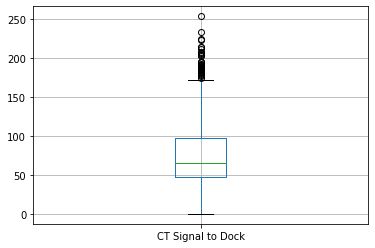

In [10]:
#Now Lets check the Outliers
df1.boxplot(column="CT Signal to Dock") #Lets See the extream values in out Target Varibale using box plot  
plt.show()

#There are few outliers in the Target 

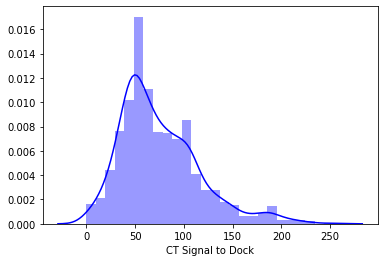

In [11]:
 #Lets see the distribusion curve
sns.distplot(df1["CT Signal to Dock"], color="blue",kde=True)

In [12]:
df1.columns

Index(['NewDCFlag', 'ColoReady At PlanReservationStart Flag',
       'DeploymentSeverity', 'EngineeringGroup', 'PlanResourceTypeName',
       'IsAddRack', 'IsFirstFootprint', 'IsNPI', 'PlanGEO', 'PlanIntentName',
       'NumberOfRacks', 'NumberOfServers', 'PlanOrderPriorityName',
       'PlanPropertyGroupName', 'Region', 'RegionGroup', 'RegionType',
       'SKU Avaliable Flag', 'SKUCategoryName', 'CT Signal to LIve',
       'CT Signal to Dock'],
      dtype='object')

In [ ]:
#Lest check the relationship between the catogorical variables and the Targert 

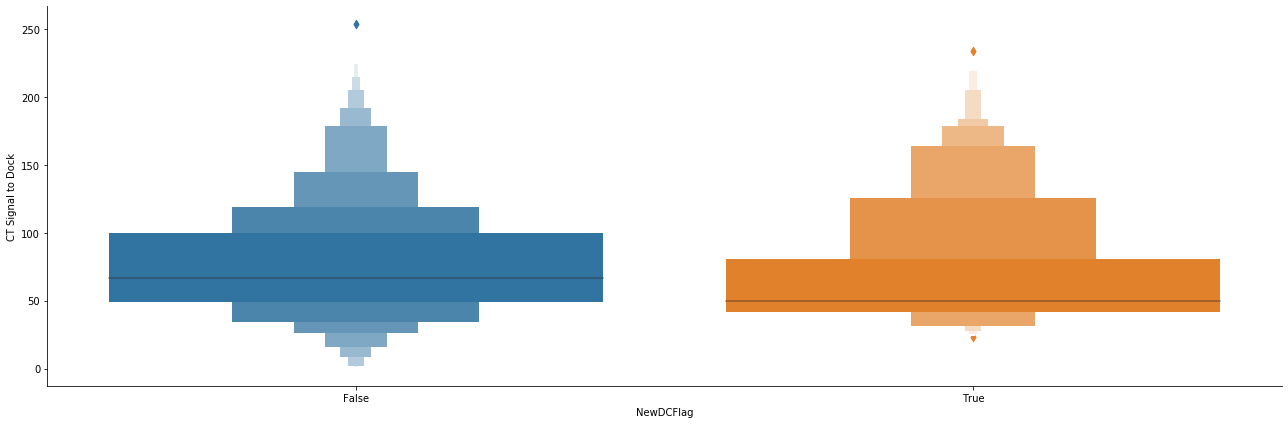

In [17]:
sns.catplot(y = "CT Signal to Dock", x = "NewDCFlag", data = df1.sort_values("CT Signal to Dock", ascending = False), 
            kind="boxen", height = 6, aspect = 3)
plt.show()

#There is no significant diffrence for this fearure 

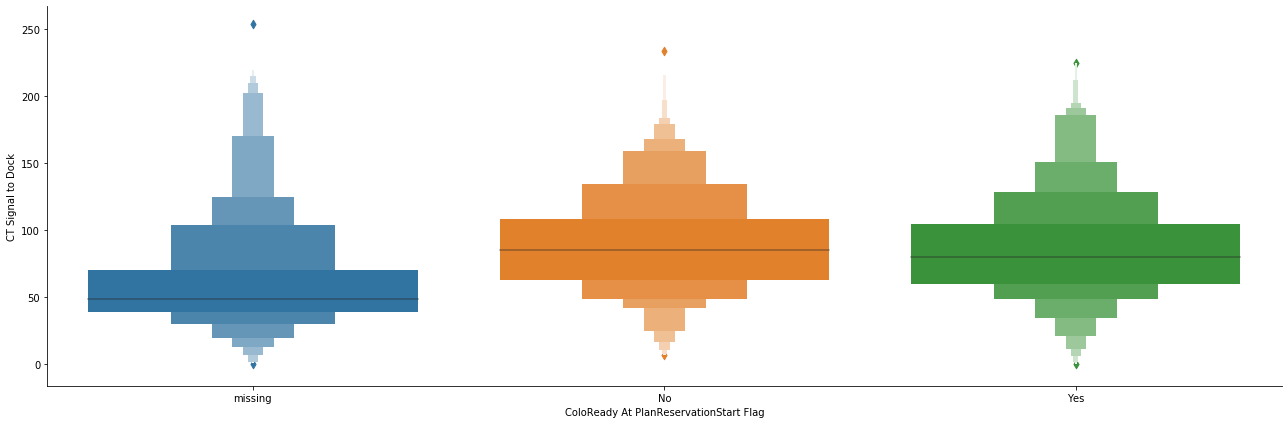

In [16]:
sns.catplot(y = "CT Signal to Dock", x = "ColoReady At PlanReservationStart Flag", data = df1.sort_values("CT Signal to Dock", ascending = False), 
            kind="boxen", height = 6, aspect = 3)
plt.show()

#There is no significant diffrence for this fearure 

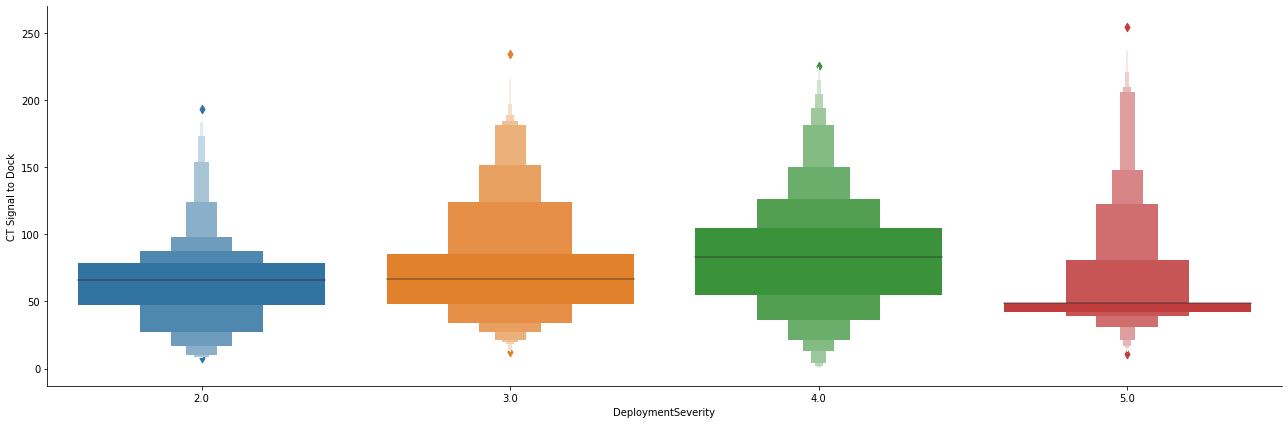

In [19]:
sns.catplot(y = "CT Signal to Dock", x = "DeploymentSeverity", data = df1.sort_values("CT Signal to Dock", ascending = False), 
            kind="boxen", height = 6, aspect = 3)
plt.show()

#There is no significant diffrence for this fearure. A very slight significance. 

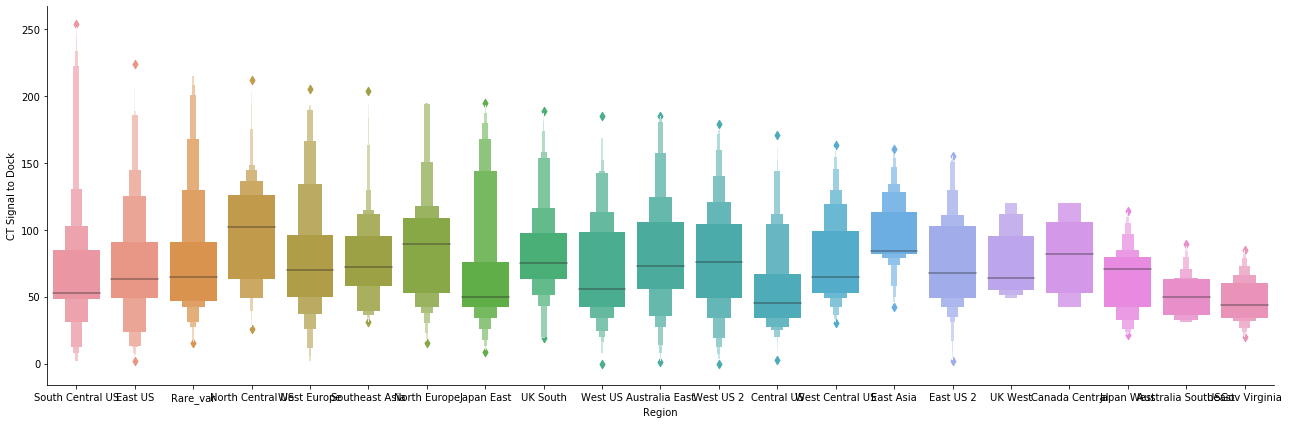

In [21]:
sns.catplot(y = "CT Signal to Dock", x = "Region", data = df1.sort_values("CT Signal to Dock", ascending = False), 
            kind="boxen", height = 6, aspect = 3)
plt.show()

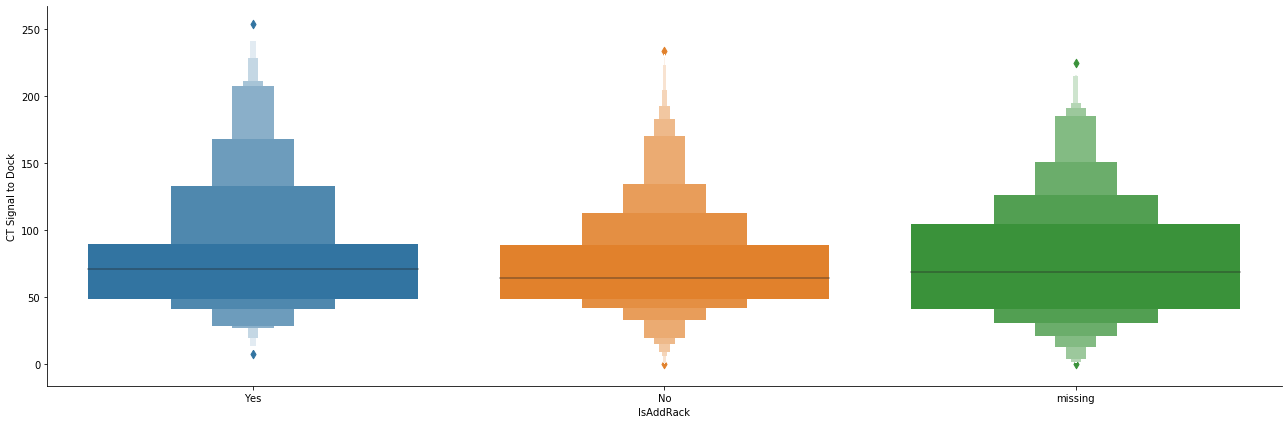

In [22]:
sns.catplot(y = "CT Signal to Dock", x = "IsAddRack", data = df1.sort_values("CT Signal to Dock", ascending = False), 
            kind="boxen", height = 6, aspect = 3)
plt.show()

#There is no significant diffrence for this fearure 

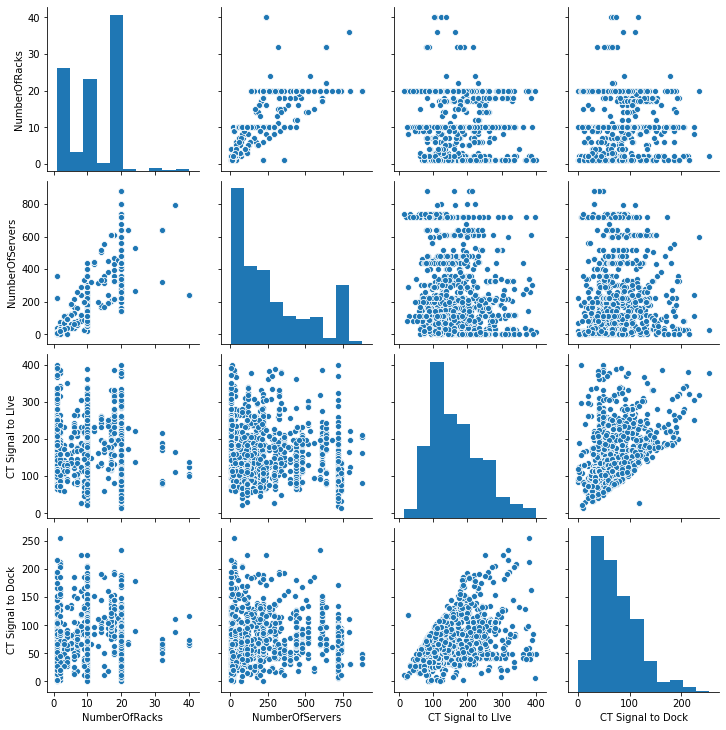

In [23]:
# Let's plot a pair plot of all variables in our dataframe
sns.pairplot(df1.select_dtypes(include='float64'))

In [24]:
df1.columns

Index(['NewDCFlag', 'ColoReady At PlanReservationStart Flag',
       'DeploymentSeverity', 'EngineeringGroup', 'PlanResourceTypeName',
       'IsAddRack', 'IsFirstFootprint', 'IsNPI', 'PlanGEO', 'PlanIntentName',
       'NumberOfRacks', 'NumberOfServers', 'PlanOrderPriorityName',
       'PlanPropertyGroupName', 'Region', 'RegionGroup', 'RegionType',
       'SKU Avaliable Flag', 'SKUCategoryName', 'CT Signal to LIve',
       'CT Signal to Dock'],
      dtype='object')

In [26]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
cols=['NewDCFlag', 'ColoReady At PlanReservationStart Flag',
        'EngineeringGroup', 'PlanResourceTypeName',
       'IsAddRack', 'IsFirstFootprint', 'IsNPI', 'PlanGEO', 'PlanIntentName',
        'PlanOrderPriorityName',
       'PlanPropertyGroupName', 'Region', 'RegionGroup', 'RegionType',
       'SKU Avaliable Flag', 'SKUCategoryName']

df2=df1.copy()
df2[cols] = df1[cols].apply(le.fit_transform)

In [27]:
df2.head()

,NewDCFlag,ColoReady At PlanReservationStart Flag,DeploymentSeverity,EngineeringGroup,PlanResourceTypeName,IsAddRack,IsFirstFootprint,IsNPI,PlanGEO,PlanIntentName,...,NumberOfServers,PlanOrderPriorityName,PlanPropertyGroupName,Region,RegionGroup,RegionType,SKU Avaliable Flag,SKUCategoryName,CT Signal to LIve,CT Signal to Dock
0,1,2,5,0,7,2,0,0,1,1,...,800.0,2,2,13,0,0,0,0,124.0,31.0
1,0,2,5,0,24,2,0,0,1,1,...,280.0,2,8,13,0,0,0,0,126.0,42.0
2,1,2,5,0,7,2,0,0,5,1,...,800.0,2,3,18,0,0,0,0,198.0,31.0
3,0,2,5,0,26,2,0,0,13,1,...,880.0,2,4,19,0,1,0,0,207.0,49.0
4,1,2,5,0,7,2,0,0,5,1,...,800.0,2,3,10,0,0,0,0,221.0,31.0


In [30]:
# Putting feature variable to X
x = df2.drop(['CT Signal to LIve','CT Signal to Dock'], axis=1)

# Putting response variable to y
y = df2['CT Signal to Dock']

#random_state is the seed used by the random number generator. It can be any integer.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=100)

In [31]:
x_train.shape

(749, 19)

In [33]:
x_test.shape

(321, 19)

In [35]:
# Initialize and fit regressor
from sklearn.ensemble import RandomForestRegressor

tree2 = RandomForestRegressor(criterion='mse')         
tree2.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [36]:
#prediction
y_train_predict=tree2.predict(x_train)
y_test_predict=tree2.predict(x_test)

In [37]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [38]:
#Error calculation
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_predict))
train_MAE = mean_absolute_error(y_train, y_train_predict)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_predict))
test_MAE = mean_absolute_error(y_test, y_test_predict)

In [39]:
print('rmse_train :',train_rmse, 'MAE_train', train_MAE)
print('rmse_test :',test_rmse, 'MAE_test', test_MAE)

rmse_train : 13.857040705529634 MAE_train 9.09136431327863
rmse_test : 36.54143868292023 MAE_test 24.050463194965808


In [40]:
pd.DataFrame({'gini':tree2.feature_importances_, 'varname':x_train.columns}).sort_values('gini', ascending=False)

,gini,varname
3,0.133418,EngineeringGroup
11,0.123283,NumberOfServers
14,0.105684,Region
8,0.082824,PlanGEO
4,0.068339,PlanResourceTypeName
1,0.066119,ColoReady At PlanReservationStart Flag
2,0.058540,DeploymentSeverity
13,0.054059,PlanPropertyGroupName
9,0.047737,PlanIntentName
12,0.044277,PlanOrderPriorityName


In [41]:
#Lets do hyperparameter tunning 
# We are going to use RandomizedsearchCV
from sklearn.model_selection import RandomizedSearchCV

In [42]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [43]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [44]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf=RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', 
                               n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [45]:
#Fit the data
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.9s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.8s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.7s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.7s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.7s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   3.0s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   4.8s
[CV] n_estimators=1100, min_samples_split=10, mi

[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.0s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.0s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.0s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.0s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.4s
[CV] n_estimators=700, min_samples_split=15, min_sam

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  2.1min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [46]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [47]:
random_pred= rf_random.predict(x_test)

In [48]:
#Error calculation
RMSE = np.sqrt(mean_squared_error(y_test, random_pred))
MAE = mean_absolute_error(y_test, random_pred)
r_squre= r2_score(y_test, random_pred)

In [49]:
print('RMSE :',RMSE) 
print('MAE:', MAE)
print("r_square:",r_squre)

RMSE : 35.57955923427969
MAE: 23.406517321267856
r_square: 0.3380697362935696
